# Sentiment analysis IMDb

Want to load in the txt files and create a database with the star rating and unique id.

In [1]:
import glob
import os
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


The dataset has directories with txt files for positive and negative reviews. We combine these to make one dataset. yay

In [2]:
neg_file_list = glob.glob(os.path.join(os.getcwd(), 
                                       "C:\\Users\\sebsj\\Desktop\\Python_VIP\\VIP-AI\\Sentiment Analysis\\data\\neg","*.txt"))

corpus = []
ids = []
ratings = []

for file in neg_file_list:
    # get head and tail of txt file name
    head, file_name = os.path.split(file)
    
    id = file_name.split("_")[0]
    rating = (file_name.split("_")[1].split(".")[0])
    
    with open(file, encoding="utf8") as f_input:
        corpus.append(f_input.read())
        ids.append(id)
        ratings.append(rating)
        
dict = {'id': ids, 'text': corpus, 'rating': ratings} 
df_neg = pd.DataFrame(dict)

In [3]:
pos_file_list = glob.glob(os.path.join(os.getcwd(), 
                                       "C:\\Users\\sebsj\\Desktop\\Python_VIP\\VIP-AI\\Sentiment Analysis\\data\\pos","*.txt"))

corpus = []
ids = []
ratings = []

for file in pos_file_list:
    # get head and tail of txt file name
    head, file_name = os.path.split(file)
    
    # id is a keyword baka
    id = file_name.split("_")[0]
    rating = (file_name.split("_")[1].split(".")[0])
    
    with open(file, encoding="utf8") as f_input:
        corpus.append(f_input.read())
        ids.append(id)
        ratings.append(rating)
        
dict = {'id': ids, 'text': corpus, 'rating': ratings} 
df_pos = pd.DataFrame(dict)

In [4]:
neg_file_list = glob.glob(os.path.join(os.getcwd(), 
                                       "C:\\Users\\sebsj\\Desktop\\Python_VIP\\VIP-AI\\Sentiment Analysis\\data\\neg","*.txt"))
pos_file_list = glob.glob(os.path.join(os.getcwd(), 
                                       "C:\\Users\\sebsj\\Desktop\\Python_VIP\\VIP-AI\\Sentiment Analysis\\data\\pos","*.txt"))
file_list = pos_file_list + neg_file_list

corpus = []
ids = []
ratings = []

for file in file_list:
    # get head and tail of txt file name
    head, file_name = os.path.split(file)
    
    id = file_name.split("_")[0]
    rating = (file_name.split("_")[1].split(".")[0])
    
    with open(file, encoding="utf8") as f_input:
        corpus.append(f_input.read())
        ids.append(id)
        ratings.append(rating)
    

In [5]:
dict = {'id': ids, 'text': corpus, 'rating': ratings} 

In [6]:
df = pd.DataFrame(dict)

In [7]:
df.head()

,id,text,rating
0,10000,Homelessness (or Houselessness as George Carli...,8
1,10008,"You know, Robin Williams, God bless him, is co...",7
2,10013,"Like one of the previous commenters said, this...",7
3,10019,"When it comes to movies I can be pretty picky,...",8
4,10020,The legendary Boris Karloff ended his illustri...,8


Check for duplicates.

In [8]:
duplicateRows = df[df.duplicated()]
duplicateRows

,id,text,rating


Check for null values - no null values or misssing data.

In [9]:
check_nan = df['rating'].isnull().values.any()
check_nan

False

## Data analysis

The dataset uses the Large Movie Review Dataset: https://ai.stanford.edu/~amaas/data/sentiment/ <br>

Movies are rated on a scale of 1-10 [inclusive]. All ratings below or equal to 6 are considered negative, vice versa for ratings larger than 6. We assign 1 to ratings above 6 as they are considered positive in sentiment.

In [10]:
def map_score(rating):
    if int(rating) < 5:
        return 0
    else:
        return 1

df["sentiment"] = df["rating"].apply(lambda rating: map_score(rating))

In [16]:
df.sample()

,id,text,rating,sentiment
2823,344,Let me be really clear about this movie. I did...,2,0


Don't have any ratings of 5 and 6 - ambiguous ratings.

In [17]:
df.loc[df['rating'] == "5"]
df.loc[df['rating'] == "6"]

,id,text,rating,sentiment


Question: Do people who write reveiws have strong opinions on the movie? <br>
Probably, does the data show this? <br>
Let's look at average length of the reviews - this may indicate whether reviewers write in detail or not.

In [40]:
def plot_word_length_histogram(text):
    text.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

(0.0, 900.0)

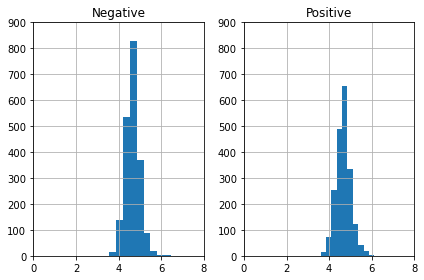

In [51]:
plt.figure(layout='tight')

plt.subplot(1,2,1)
plt.title("Negative")
plot_word_length_histogram(df_neg['text'])
plt.xlim([0,8])
plt.ylim([0, 900])


plt.subplot(1,2,2)
plt.title("Positive")
plot_word_length_histogram(df_pos['text'])
plt.xlim([0,8])
plt.ylim([0, 900])

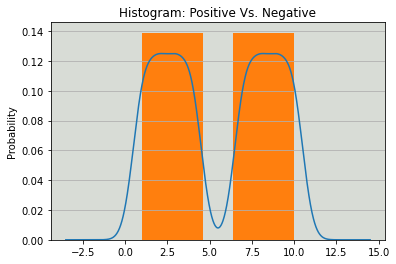

In [62]:
df['ratingInt'] = [int(x) for x in df['rating']]

fig, ax = plt.subplots()
df['ratingInt'].plot.kde(ax=ax, legend=False, title='Histogram: Positive Vs. Negative')
df['ratingInt'].plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

In [92]:
df['text_length'] = df['text'].map(lambda x: len(x.strip()))
df['nwords'] = df['text'].map(lambda x: x.strip().count(' ') + 1)
print(f'Sample text: {df.loc[20,"text"]} \n\nvalue of text_length: {df.loc[20,"text_length"]}')

Sample text: After 'Aakrosh' , this was the second film for Govind Nihalani as a director.Till this movie was made there was no audience for documentaries in India.This movie proved a point that a documentary can fulfil the requirements of a commercial film without diluting its essence. It was one of the successful movies in the year in which it was released. This movie contested against the big banners of the bollywood like'COOLIE', 'BETAAB','HERO' in 1983.<br /><br />SmithaPatel, in this movie acted more like a conscience of the hero whenever he drifted away or lost his composure she was there to remind him. She was not like an usual heroine to do the usual stuff of running around the trees and shrubs.At one time,she even gave up her love when the hero's ruthlessness touched the roof top.<br /><br />There was another character in this movie, which was played by Om Puri contemporary, Naseeruddin Shah.He played as an inspector-turned-alcoholic character.The role conveyed the message of

Average number of words per review is 240. This indicates that each reviewer tends to write descriptive reviews. Also, all the reviews in the dataset rate movies in the range [0,4] and [7, 10]. These are quite polarised movie reviews to begin with.

In [82]:
print(df['text_length'].mean())
print(df['nwords'].mean())

1377.6395
242.55225


<AxesSubplot:title={'center':'Words in review'}>

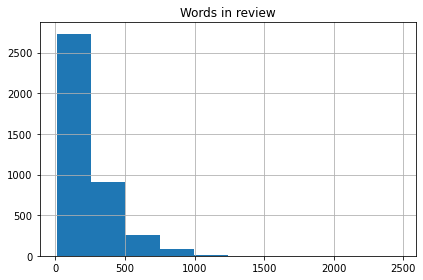

In [93]:
plt.figure(layout='tight')

plt.title("Words in review")
df['nwords'].hist()
# plt.xlim([0,8])
# plt.ylim([0, 900])

## Text Cleaning

Each review consists of text, similar to the one below.

In [39]:
row1 = df['text'][20]
row1

'After \'Aakrosh\' , this was the second film for Govind Nihalani as a director.Till this movie was made there was no audience for documentaries in India.This movie proved a point that a documentary can fulfil the requirements of a commercial film without diluting its essence. It was one of the successful movies in the year in which it was released. This movie contested against the big banners of the bollywood like\'COOLIE\', \'BETAAB\',\'HERO\' in 1983.<br /><br />SmithaPatel, in this movie acted more like a conscience of the hero whenever he drifted away or lost his composure she was there to remind him. She was not like an usual heroine to do the usual stuff of running around the trees and shrubs.At one time,she even gave up her love when the hero\'s ruthlessness touched the roof top.<br /><br />There was another character in this movie, which was played by Om Puri contemporary, Naseeruddin Shah.He played as an inspector-turned-alcoholic character.The role conveyed the message of th

We can remove:<br>
- punctuation <br> 
- numbers <br>
- english stop words <br>
- \<br> html comments 
- Capitalisation - to compare word occurrences across reviews
- remove punctuation - movie reviews are informal, so people's use may differ and not provide much insight.

In [18]:
#Defining stop_words and lemmatizer
stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()

#Removing the html tags
def remove_html(text):
    my_list = text.split()
    my_list = [i.replace('<br', '').replace('/><br', '').replace('/>', '') for i in my_list]
#     return " ".join(my_list)
    return my_list
    

#Defining clean_text function
def clean_text(text):
    text = remove_html(text)
    text = re.sub(r'[^A-Za-z0-9]+',' ',str(text))
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

#Creating new column for processed reviews
df['Processed_text'] = df.text.apply(lambda x: clean_text(x))

In [19]:
df.head()

,id,text,rating,sentiment,Processed_text
0,10000,Homelessness (or Houselessness as George Carli...,8,1,homelessness houselessness george carlin stat...
1,10008,"You know, Robin Williams, God bless him, is co...",7,1,know robin williams god bless constantly shoo...
2,10013,"Like one of the previous commenters said, this...",7,1,like one previous commenters say foundation g...
3,10019,"When it comes to movies I can be pretty picky,...",8,1,come movie pretty picky complain anything eve...
4,10020,The legendary Boris Karloff ended his illustri...,8,1,legendary boris karloff end illustrious caree...


# Split data into train and test

In [100]:
# Let's seperate x and y for training data: 
x = df['Processed_text']
y = df['sentiment']

# xtrain, ytrain -- do i need to do this if I have test and train already??
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 1)

# Bag of words vectorisation

In [101]:
from sklearn.feature_extraction.text import CountVectorizer

countVec = CountVectorizer(stop_words='english')
train_bag_of_words = countVec.fit_transform(xtrain)  # fit train
test_bag_of_words = countVec.fit_transform(xtest)  # fit test

# bow = pd.DataFrame(data=bag_of_words.todense(),index=df['Processed_text'],columns = countVec.get_feature_names_out())

In [102]:
# train_bag_of_words = train_bag_of_words[:1200]
print(train_bag_of_words.shape)
print(test_bag_of_words.shape)

(2800, 23271)
(1200, 15198)


# TF-IDF vectorisation

In [132]:
# Let's convert words to numbers using TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')

xtrain_tfidf = vectorizer.fit_transform(xtrain).toarray()  # converting words to numbers for train data 
xtest_tfidf = vectorizer.transform(xtest).toarray()        # converting words to numbers for test data 

In [133]:
# xtrain_tfidf = xtrain_tfidf[:]
print(xtrain_tfidf.shape)
print(xtest_tfidf.shape)

(2800, 23271)
(1200, 23271)


# SVM model

In [103]:
from sklearn import svm

model_svm = svm.SVC(C=8.0, kernel='linear')
model_svm.fit(train_bag_of_words, ytrain)

SVC(C=8.0, kernel='linear')

In [104]:
from sklearn.model_selection import cross_val_score
model_svm_acc = cross_val_score(estimator=model_svm, X=train_bag_of_words, y=ytrain, cv=5, n_jobs=-1)
model_svm_acc

array([0.7875    , 0.825     , 0.83214286, 0.83035714, 0.77142857])

# Decision Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier

model_dec = DecisionTreeClassifier(max_depth=10, random_state=0)
model_dec.fit(train_bag_of_words, ytrain)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [106]:
model_dec_acc = cross_val_score(estimator=model_dec, X=train_bag_of_words, y=ytrain, cv=5, n_jobs=-1)
model_dec_acc

array([0.66964286, 0.72142857, 0.68928571, 0.70357143, 0.67321429])

In [107]:
model_dec.predict(train_bag_of_words[:10])

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

# Naive Bayes

In [108]:
from sklearn.naive_bayes import GaussianNB

model_gnb = GaussianNB()
model_gnb.fit(train_bag_of_words.toarray(), ytrain)

GaussianNB()

In [109]:
model_gnb_acc = cross_val_score(estimator=model_gnb, X=train_bag_of_words.toarray(), y=ytrain, cv=5, n_jobs=-1)
model_gnb_acc

array([0.63392857, 0.66071429, 0.65178571, 0.6625    , 0.63571429])

In [110]:
model_gnb.predict(train_bag_of_words[:10].toarray())

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

# Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression

model_lg = LogisticRegression(max_iter=500)  # had to increase max iterations - not enough repetitions to decide categories
model_lg.fit(train_bag_of_words, ytrain)

LogisticRegression(max_iter=500)

In [116]:
model_lg_acc = cross_val_score(estimator=model_lg, X=train_bag_of_words, y=ytrain, cv=5, n_jobs=-1)
model_lg_acc

array([0.81785714, 0.83392857, 0.83571429, 0.84285714, 0.79285714])

In [117]:
model_gnb.predict(train_bag_of_words[:10].toarray())

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

# XGBoost

In [156]:
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics


pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        eval_metric='auc',
        # colsample_bytree=0.8,
        # subsample=0.7,
        # min_child_weight=5,
    ))
])

In [157]:
# Fit the pipeline with the data
pipe.fit(xtrain, ytrain)

y_pred_class = pipe.predict(xtest)
y_pred_train = pipe.predict(xtrain)

print('Train: {}'.format(metrics.accuracy_score(ytrain, y_pred_train)))
print('Test: {}'.format(metrics.accuracy_score(ytest, y_pred_class)))

Train: 0.9746428571428571
Test: 0.7891666666666667


# LSTM model

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    train_padded_sentences, 
    target, 
    test_size=0.25
)

In [174]:
# Model from https://www.kaggle.com/mariapushkareva/nlp-disaster-tweets-with-glove-and-lstm/data
import keras
# from keras.models import Sequential
# from keras.initializers import Constant
# from keras.layers import (LSTM, 
#                           Embedding, 
#                           BatchNormalization,
#                           Dense, 
#                           TimeDistributed, 
#                           Dropout, 
#                           Bidirectional,
#                           Flatten, 
#                           GlobalMaxPool1D)
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.layers.embeddings import Embedding
# from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
# from keras.optimizers import Adam

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
def glove_lstm():
    model = Sequential()
    
    model.add(Embedding(
        input_dim=embedding_matrix.shape[0], 
        output_dim=embedding_matrix.shape[1], 
        weights = [embedding_matrix], 
        input_length=length_long_sentence
    ))
    
    model.add(Bidirectional(LSTM(
        length_long_sentence, 
        return_sequences = True, 
        recurrent_dropout=0.2
    )))
    
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

model = glove_lstm()
model.summary()

# Evaluation

In [155]:
# Mean Accuracy

print("SVM BoW: " + str(model_svm.score(train_bag_of_words[:1200], ytest)))
print("SVM tf-ifd: " + str(model_svm.score(xtrain_tfidf[:1200], ytest)))
print("-" * 50)
print("Decision tree BoW: " + str(model_dec.score(train_bag_of_words[:1200], ytest)))
print("Decision tree tf-idf: " + str(model_dec.score(xtrain_tfidf[:1200], ytest)))
print("-" * 50)
print("Naive Bayes: " + str(model_gnb.score(train_bag_of_words[:1200].toarray(), ytest)))
# print("Naive Bayes tf-idf: " + str(model_gnb.score(xtrain_tfidf.toarray(), ytest)))
print("-" * 50)
print("Logistic Regression BoW: " + str(model_lg.score(train_bag_of_words[:1200], ytest)))
print("Logistic Regression tf_idf: " + str(model_lg.score(xtrain_tfidf[:1200], ytest)))

SVM BoW: 0.5116666666666667
SVM tf-ifd: 0.5125
--------------------------------------------------
Decision tree BoW: 0.51
Decision tree tf-idf: 0.5133333333333333
--------------------------------------------------
Naive Bayes: 0.5091666666666667
--------------------------------------------------
Logistic Regression: 0.5116666666666667
Logistic Regression tf_idf: 0.5133333333333333
